In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

%matplotlib inline

### Bar Plot

In [2]:
drinks_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
drinks = pd.read_csv('drinks.csv', header=0, names=drinks_cols)
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


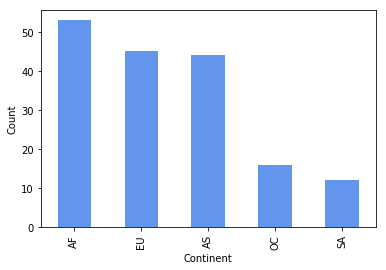

In [3]:
drinks.continent.value_counts().plot(kind='bar', color='cornflowerblue')
plt.xlabel('Continent')
plt.ylabel('Count');

### Stacked Bar Plot

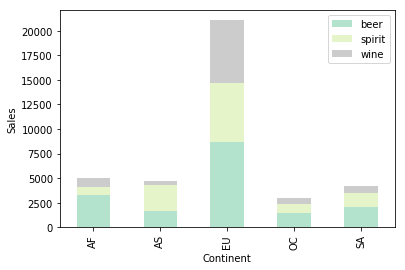

In [4]:
drinks.groupby('continent').sum().drop('liters', axis=1).plot(kind='bar', stacked=True, colormap='Pastel2')
plt.xlabel('Continent')
plt.ylabel('Sales');

### Histogram

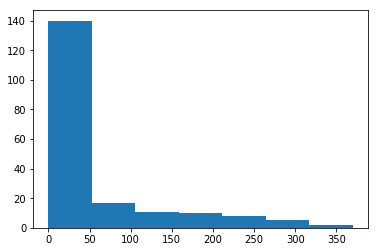

In [12]:
# using matplotlib
plt.hist(drinks['wine'], bins=7);

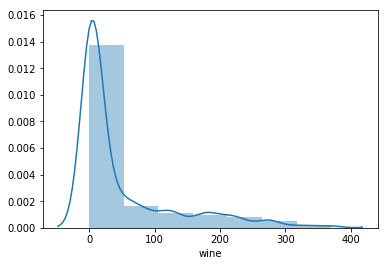

In [16]:
# using seaborn
# kde=True/False to turn on/off gaussian kernel density estimate plot
sns.distplot(drinks['wine'], kde=True, bins=7);

### Box Plot

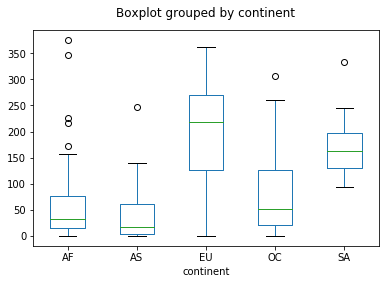

In [29]:
drinks.boxplot(column='beer', by='continent', grid=False)
plt.title('');

### Scatter Plot

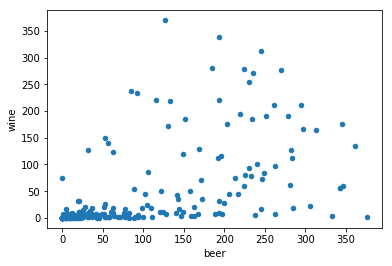

In [33]:
# scatter plot
drinks.plot(x='beer', y='wine', kind='scatter');

### Scatterplot Matrix

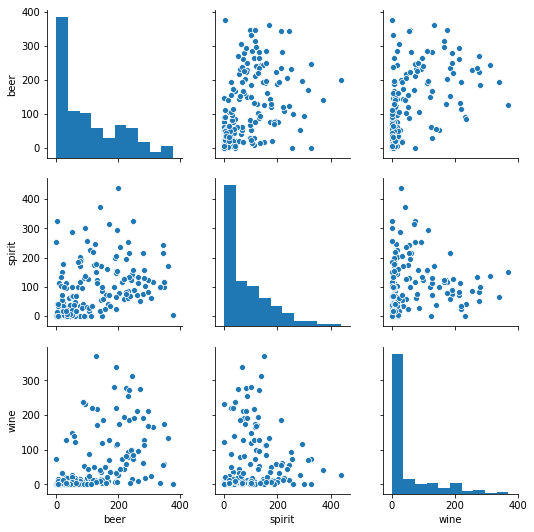

In [34]:
# scatter plot matrix
sns.pairplot(data=drinks, vars=['beer', 'spirit', 'wine']);

### Line Plot

In [35]:
ufo = pd.read_csv('ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


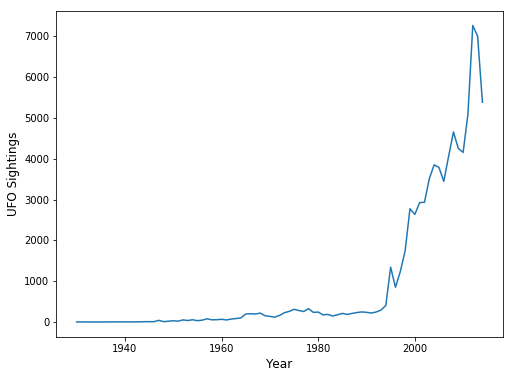

In [42]:
# set figure size
plt.figure(figsize=(8,6))
ufo.Year.value_counts().sort_index().plot(kind='line')
# set font size for axis labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('UFO Sightings', fontsize=12);

### Heatmap

In [66]:
boston_raw = load_boston()
boston = pd.DataFrame(boston_raw.data, columns=boston_raw.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


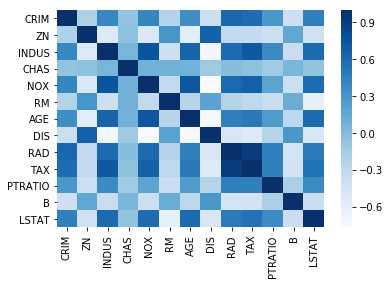

In [67]:
sns.heatmap(boston.corr(), cmap='Blues');

### Small Multiples

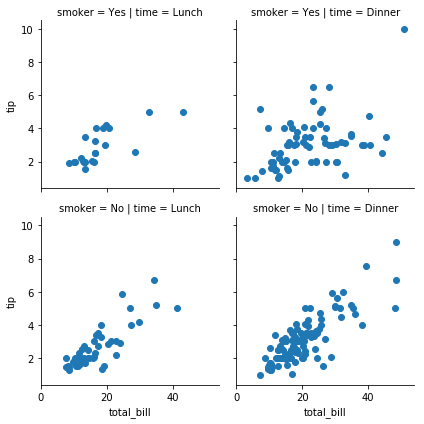

In [3]:
tips = sns.load_dataset('tips')
g = sns.FacetGrid(tips, col='time',  row='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip');

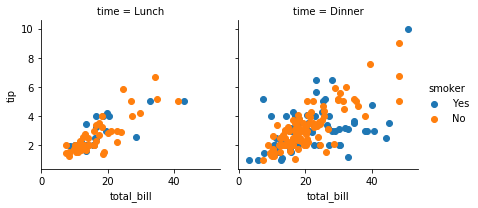

In [76]:
# repeat the plot above, distinguish smoker/non-smoker by different colors
g = sns.FacetGrid(tips, col='time',  hue='smoker')
g = (g.map(plt.scatter, 'total_bill', 'tip').add_legend())

### Violin Plot

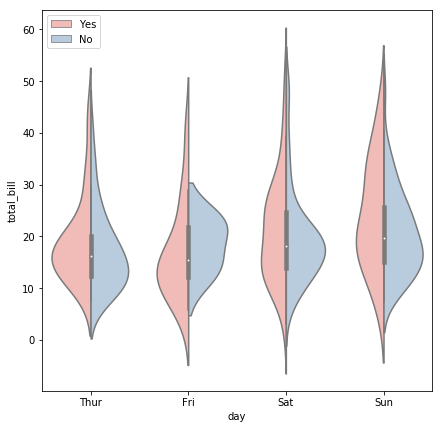

In [13]:
plt.figure(figsize=(7,7))
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, palette='Pastel1', split=True)
plt.legend(loc='upper left');

### Plot Annotation

In [77]:
music = pd.read_csv('Music Sales.csv')
music.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99


In [78]:
regionList = ['Europe','Asia']
music_Euro_Asia = music[music['Region'].isin(regionList)]
MostPopGen = music_Euro_Asia.groupby(['Genre']).Quantity.sum().sort_values(ascending=False).to_frame()
MostPopGen.head()

,Quantity
Genre,
Rock,1284
Latin,472
Alternative & Punk,401
Metal,366
Jazz,108


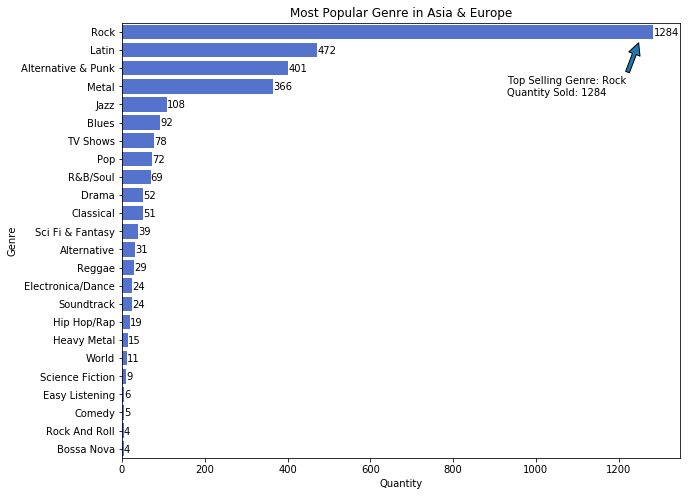

In [81]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
sns.barplot(x='Quantity', y=MostPopGen.index, data=MostPopGen, ax=ax, color='royalblue')
ax.set_title('Most Popular Genre in Asia & Europe')
ax.annotate('Top Selling Genre: Rock\nQuantity Sold: 1284', 
            xy = (1250,0.5), xytext=(930,3.5), arrowprops=dict(shrink=0.05))
for n in range(0,MostPopGen.shape[0]):
    ax.text(MostPopGen.Quantity[n]+0.5, n+0.2, MostPopGen.Quantity[n])